# Part I - Prosper Loan Visualization Project
## by (Makhura Mandy Rasemphe)

## Introduction
> The Dataset that will be used for this project is the loan data from Prosper.
> The dataset consist of features that prosper loans uses when giving out loans.
> Fetaures of interest will be explored below to determine what factors come into play when prosper loans gives individual loans.


The data can be downloaded [here](https://s3.amazonaws.com/udacity-hosted-downloads/ud651/prosperLoanData.csv)

Also see the [data dictionary](https://docs.google.com/spreadsheets/u/0/d/1gDyi_L4UvIrLTEC6Wri5nbaMmkGmLQBk-Yx3z0XDEtI/edit?usp=sharing) to understand the variables's.

## Preliminary Wrangling


In [86]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [87]:
df = pd.read_csv("prosperLoanData.csv")

In [88]:
df.head()

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,1021339766868145413AB3B,193129,2007-08-26 19:09:29.263000000,C,36,Completed,2009-08-14 00:00:00,0.16516,0.1580,0.1380,...,-133.18,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258
1,10273602499503308B223C1,1209647,2014-02-27 08:28:07.900000000,NaN,36,Current,NaN,0.12016,0.0920,0.0820,...,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
2,0EE9337825851032864889A,81716,2007-01-05 15:00:47.090000000,HR,36,Completed,2009-12-17 00:00:00,0.28269,0.2750,0.2400,...,-24.20,0.0,0.0,0.0,0.0,1.0,0,0,0.0,41
3,0EF5356002482715299901A,658116,2012-10-22 11:02:35.010000000,NaN,36,Current,NaN,0.12528,0.0974,0.0874,...,-108.01,0.0,0.0,0.0,0.0,1.0,0,0,0.0,158
4,0F023589499656230C5E3E2,909464,2013-09-14 18:38:39.097000000,NaN,36,Current,NaN,0.24614,0.2085,0.1985,...,-60.27,0.0,0.0,0.0,0.0,1.0,0,0,0.0,20


In [89]:
df.shape

(113937, 81)

dataset contains 113937 entries and 81 columns

In [90]:
df.columns

Index(['ListingKey', 'ListingNumber', 'ListingCreationDate', 'CreditGrade',
       'Term', 'LoanStatus', 'ClosedDate', 'BorrowerAPR', 'BorrowerRate',
       'LenderYield', 'EstimatedEffectiveYield', 'EstimatedLoss',
       'EstimatedReturn', 'ProsperRating (numeric)', 'ProsperRating (Alpha)',
       'ProsperScore', 'ListingCategory (numeric)', 'BorrowerState',
       'Occupation', 'EmploymentStatus', 'EmploymentStatusDuration',
       'IsBorrowerHomeowner', 'CurrentlyInGroup', 'GroupKey',
       'DateCreditPulled', 'CreditScoreRangeLower', 'CreditScoreRangeUpper',
       'FirstRecordedCreditLine', 'CurrentCreditLines', 'OpenCreditLines',
       'TotalCreditLinespast7years', 'OpenRevolvingAccounts',
       'OpenRevolvingMonthlyPayment', 'InquiriesLast6Months', 'TotalInquiries',
       'CurrentDelinquencies', 'AmountDelinquent', 'DelinquenciesLast7Years',
       'PublicRecordsLast10Years', 'PublicRecordsLast12Months',
       'RevolvingCreditBalance', 'BankcardUtilization',
       'Availa

Above are the names of all the 81 columns.

In [91]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 81 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   ListingKey                           113937 non-null  object 
 1   ListingNumber                        113937 non-null  int64  
 2   ListingCreationDate                  113937 non-null  object 
 3   CreditGrade                          28953 non-null   object 
 4   Term                                 113937 non-null  int64  
 5   LoanStatus                           113937 non-null  object 
 6   ClosedDate                           55089 non-null   object 
 7   BorrowerAPR                          113912 non-null  float64
 8   BorrowerRate                         113937 non-null  float64
 9   LenderYield                          113937 non-null  float64
 10  EstimatedEffectiveYield              84853 non-null   float64
 11  EstimatedLoss

- Above datatypes for each column can be seen as well as the number of non-null values.
- A number of columns contains missing values such as LoanFirstDefaultedCycleNumber, ProsperPrincipalBorrowed etc

In [92]:
df.duplicated().sum()

0

No duplicates were found.

In [93]:
df.ListingKey.nunique()

113066

There 113066 unique listing keys.

### What is the structure of your dataset?

> The dataset consist of 113937 loans with 81 features.

### What is/are the main feature(s) of interest in your dataset?

> I am mostly interested in features that best prdicts the likelihood of an individual receiving a loan.

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> Listing Category: which will give an insight into the various reasons individuals take loans

> Employment Status: Employed people are most likely eligible to receive loans.

> Income Range: The higher the income range , the higher the chances of getting a loan

> Prosper Loan: Does an individual credit score rating affect whether they receive a loan?

> Stated Monthly Income : Does the amount of income an individual earn affect whether they get a loan

> Borrower's Rate: Is there  a relationship between a borrowers interst rate and other factors such Incoe Range, Stated Monthly Income etc

> Estimated Return: What factors have an impact on the calculation of the estimated return

### Data Wrangling

Extract only the features that will be used for the investigation and create a dataframe.

In [94]:
#Create a new dataframe with only the required columns
new_df = df[["LoanStatus","ListingCategory (numeric)", "EmploymentStatus", "IncomeRange","ProsperScore","StatedMonthlyIncome", "BorrowerRate","EstimatedReturn","Occupation"]]

In [95]:
new_df.head()

,LoanStatus,ListingCategory (numeric),EmploymentStatus,IncomeRange,ProsperScore,StatedMonthlyIncome,BorrowerRate,EstimatedReturn,Occupation
0,Completed,0,Self-employed,"$25,000-49,999",NaN,3083.333333,0.1580,NaN,Other
1,Current,2,Employed,"$50,000-74,999",7.0,6125.000000,0.0920,0.05470,Professional
2,Completed,0,Not available,Not displayed,NaN,2083.333333,0.2750,NaN,Other
3,Current,16,Employed,"$25,000-49,999",9.0,2875.000000,0.0974,0.06000,Skilled Labor
4,Current,2,Employed,"$100,000+",4.0,9583.333333,0.2085,0.09066,Executive


In [96]:
new_df.shape

(113937, 9)

- The new dataframe consists of 113937 entries and 9 features.

In [97]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 9 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   LoanStatus                 113937 non-null  object 
 1   ListingCategory (numeric)  113937 non-null  int64  
 2   EmploymentStatus           111682 non-null  object 
 3   IncomeRange                113937 non-null  object 
 4   ProsperScore               84853 non-null   float64
 5   StatedMonthlyIncome        113937 non-null  float64
 6   BorrowerRate               113937 non-null  float64
 7   EstimatedReturn            84853 non-null   float64
 8   Occupation                 110349 non-null  object 
dtypes: float64(4), int64(1), object(4)
memory usage: 7.8+ MB


The data types of each column cab be seen above.
It can aslo be noted that some columns contain missing values such as:
  - EmploymentStatus
  - ProsperScore
  - EstimatedReturn
  - Occupation

In [98]:
new_df.describe()

,ListingCategory (numeric),ProsperScore,StatedMonthlyIncome,BorrowerRate,EstimatedReturn
count,113937.000000,84853.000000,1.139370e+05,113937.000000,84853.000000
mean,2.774209,5.950067,5.608026e+03,0.192764,0.096068
std,3.996797,2.376501,7.478497e+03,0.074818,0.030403
min,0.000000,1.000000,0.000000e+00,0.000000,-0.182700
25%,1.000000,4.000000,3.200333e+03,0.134000,0.074080
50%,1.000000,6.000000,4.666667e+03,0.184000,0.091700
75%,3.000000,8.000000,6.825000e+03,0.250000,0.116600
max,20.000000,11.000000,1.750003e+06,0.497500,0.283700


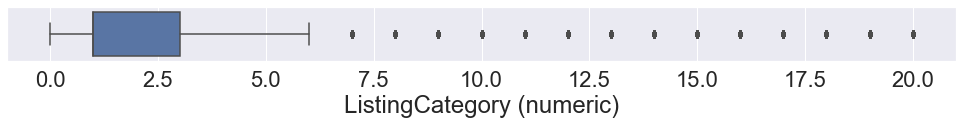

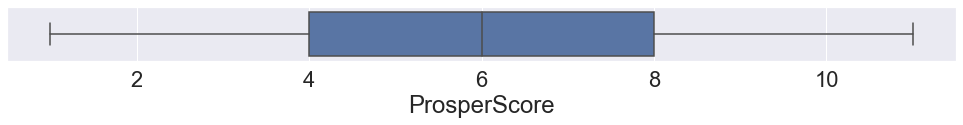

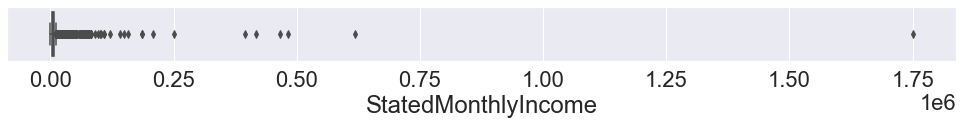

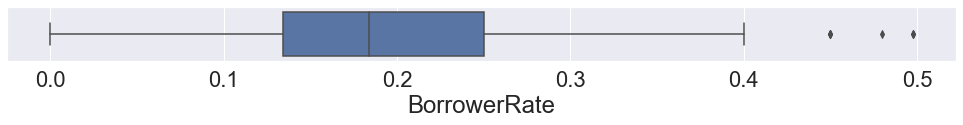

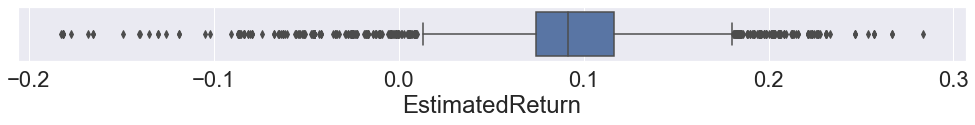

In [99]:
plt.rcParams.update({'figure.max_open_warning': 0})
df1=new_df.select_dtypes(exclude=['object'])
for column in df1:
        plt.figure(figsize=(17,1))
        sb.boxplot(data=new_df, x=column)

As can be seen from above plots, StatedMonthlyIncome, BorrowerRate and EstimatedReturn consists of outliers

### Data Cleaning

rename ListingCategory (numeric) column to ListingCategory for column naming consistency

In [100]:
#Rename Colum
new_df.rename(columns={'ListingCategory (numeric)':'ListingCategory'}, inplace=True)

In [101]:
new_df.head(1)

,LoanStatus,ListingCategory,EmploymentStatus,IncomeRange,ProsperScore,StatedMonthlyIncome,BorrowerRate,EstimatedReturn,Occupation
0,Completed,0,Self-employed,"$25,000-49,999",NaN,3083.333333,0.158,NaN,Other


In [102]:
#Map the values to reasons
dictionary = {0:'Not Available', 1:'Debt Consolidation', 2:'Home Improvements', 3:'Business', 4:'Personal',
              5:'Student Use', 6:'Auto', 7:'Other', 8:'Baby&Adoption', 9:'Boat', 10:'Cosmetic Procedure', 11:'Engagement Ring',
              12:'Green Loans', 13:'Household Expenses', 14:'Large Purchases', 15:'Medical/Dental', 16:'Motorcycle',17:'RV', 18:'Taxes',
              19:'Vacation',20:'Wedding'}
new_df['ListingCategory'] = new_df['ListingCategory'].map(dictionary)

In [103]:
new_df.ListingCategory.head()

0        Not Available
1    Home Improvements
2        Not Available
3           Motorcycle
4    Home Improvements
Name: ListingCategory, dtype: object

As can be seen above the values gave been changed from the numeric representation to the actual reason for clarity purposes.

Below we will drop rows that contains missing values.

In [104]:
new_df.dropna(axis=0, how="any", inplace=True)

In [105]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 83520 entries, 1 to 113936
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   LoanStatus           83520 non-null  object 
 1   ListingCategory      83520 non-null  object 
 2   EmploymentStatus     83520 non-null  object 
 3   IncomeRange          83520 non-null  object 
 4   ProsperScore         83520 non-null  float64
 5   StatedMonthlyIncome  83520 non-null  float64
 6   BorrowerRate         83520 non-null  float64
 7   EstimatedReturn      83520 non-null  float64
 8   Occupation           83520 non-null  object 
dtypes: float64(4), object(5)
memory usage: 6.4+ MB


- all rows that contained null values were dropped
- As can be seen above the number of rows reduced to 83520

## Univariate Exploration

> In this section, investigate distributions of individual variables. If
you see unusual points or outliers, take a deeper look to clean things up
and prepare yourself to look at relationships between variables.


> **Rubric Tip**: The project (Parts I alone) should have at least 15 visualizations distributed over univariate, bivariate, and multivariate plots to explore many relationships in the data set.  Use reasoning to justify the flow of the exploration.



>**Rubric Tip**: Use the "Question-Visualization-Observations" framework  throughout the exploration. This framework involves **asking a question from the data, creating a visualization to find answers, and then recording observations after each visualisation.** 


### Listing Category

#### 1. What are the main reasons indivduals take loans?

Text(0.5, 0, 'Count')

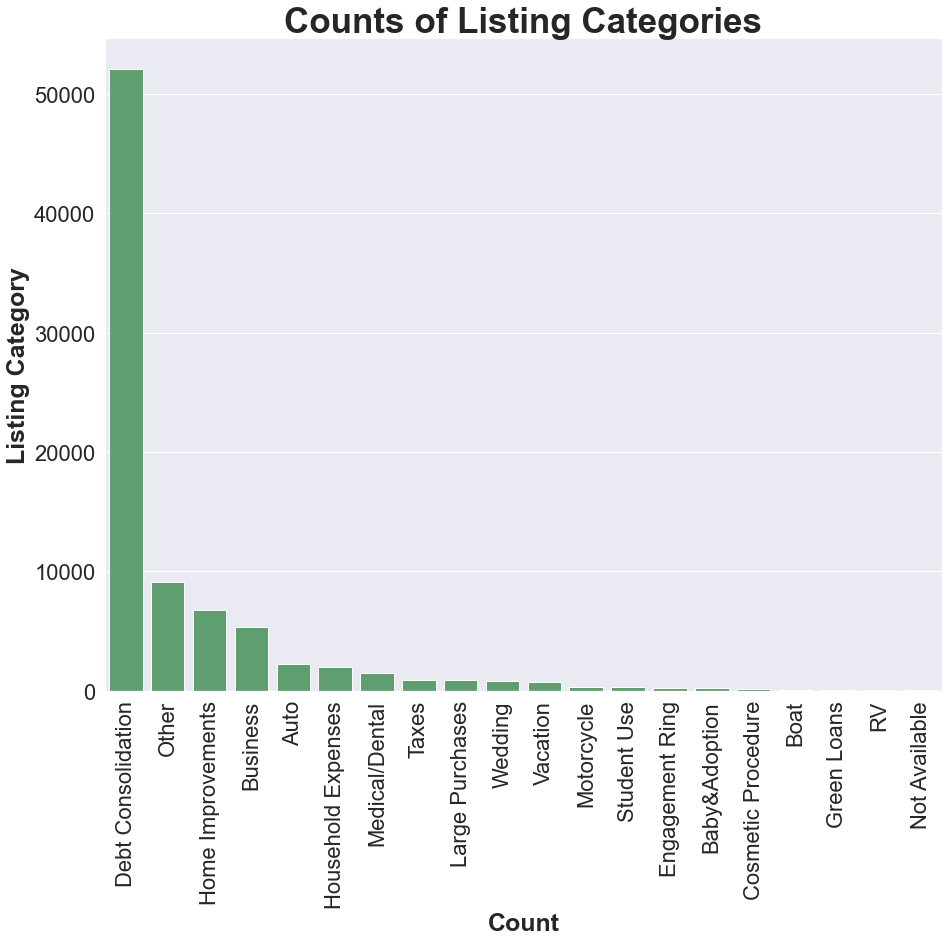

In [111]:
# Plot the category listing on a Horizontal bar chart
sb.set(font_scale=2)
plt.figure(figsize=(15,12))
base_color = sb.color_palette()[2]
type_order = new_df['ListingCategory'].value_counts().index
ax=sb.countplot(data=new_df, x='ListingCategory', color=base_color, order=type_order);
plt.xticks(rotation=90)
plt.title('Counts of Listing Categories', weight='bold', fontsize=35);
plt.ylabel('Listing Category', weight='bold', fontsize=25)
plt.xlabel('Count', weight='bold', fontsize=25)


From  the plot above it can be seen that Debt Consolidation is the major reason for individuals taking loans.

### Employment Status

#### 2. What is the employment status of most loan applicants?

Text(0, 0.5, 'Count')

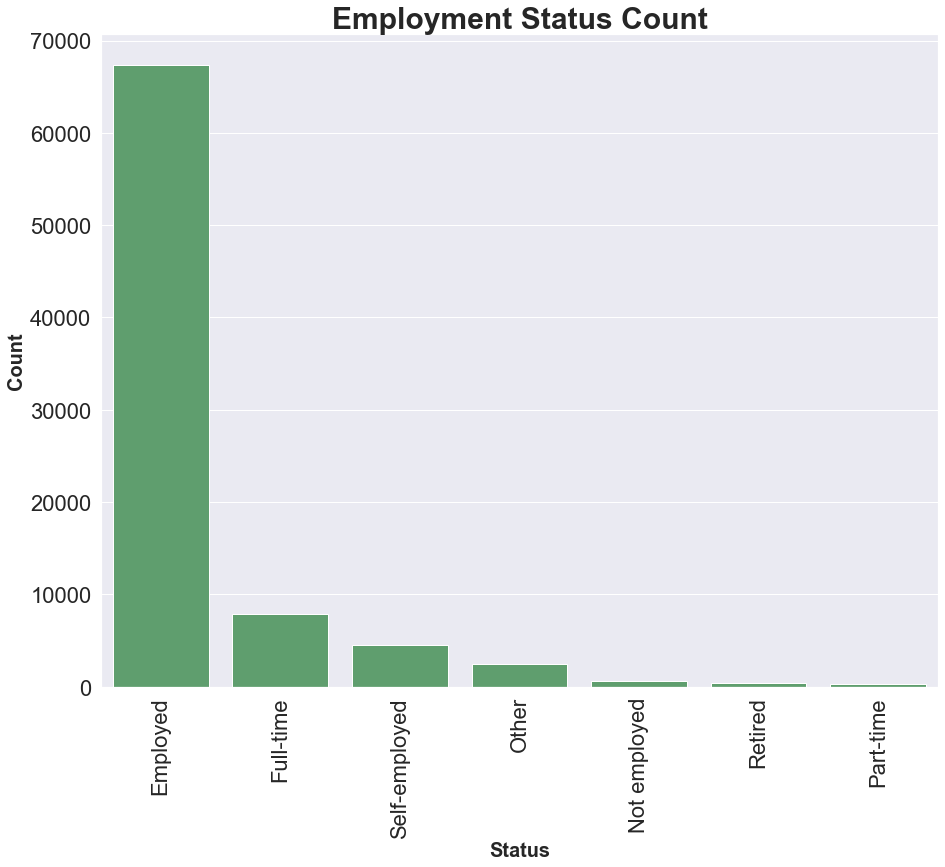

In [112]:
plt.figure(figsize=(15,12))
base_color = sb.color_palette()[2]
type_order = new_df['EmploymentStatus'].value_counts().index
ax=sb.countplot(data=new_df, x='EmploymentStatus', color=base_color, order=type_order);
plt.xticks(rotation=90)
plt.title('Employment Status Count', weight='bold', fontsize=30);
plt.xlabel('Status', weight='bold', fontsize=20)
plt.ylabel('Count', weight= 'bold', fontsize=20)

- According to the plot above, a large proportion of loan applicants is those who are employed.
- While Retired , Not employed and part time groups are the least in termas of receiving loans

### Income Range

#### 3. Most loan applicants are likely to be of lower income range?

In [113]:
# create ordinal categories for income
ordinal_rating = ['$100,000+', '$75,000-99,999', '$50,000-74,999', '$25,000-49,999', '$1-24,999', '$0','Not employed','Not displayed' ]
ordered_var = pd.api.types.CategoricalDtype(ordered = True, categories = ordinal_rating)
new_df['IncomeRange'] = new_df['IncomeRange'].astype(ordered_var)

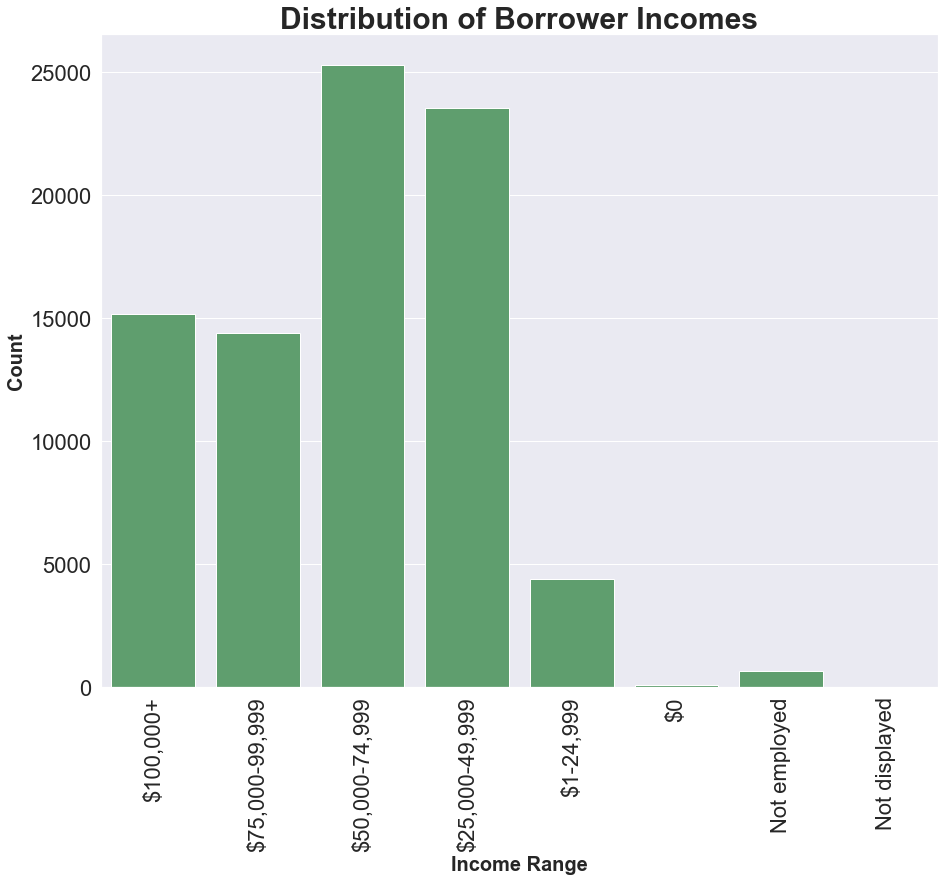

In [114]:
plt.figure(figsize =(15,12))
sb.countplot(data = new_df, x = 'IncomeRange', color = base_color)
plt.xticks(rotation=90)
plt.ylabel('Count', weight='bold', fontsize=20)
plt.xlabel('Income Range', weight = 'bold', fontsize= 20)
plt.title('Distribution of Borrower Incomes',weight = 'bold', fontsize=30);

- Individuals with an income range between 25,000 dollars  and  49,999 dollars are the ones with most loan applications followed by those with an income between 50,000 and 74,999 dollars. 
- While Not employed and 0 dollars group are the least in terms of loan applications.
- Middle class income range of 75 000 dollars to 74 999 dollars have the highest applications.

### Prosper Score
#### 4. What is the prosper score frequency distribution?

Text(0, 0.5, 'count')

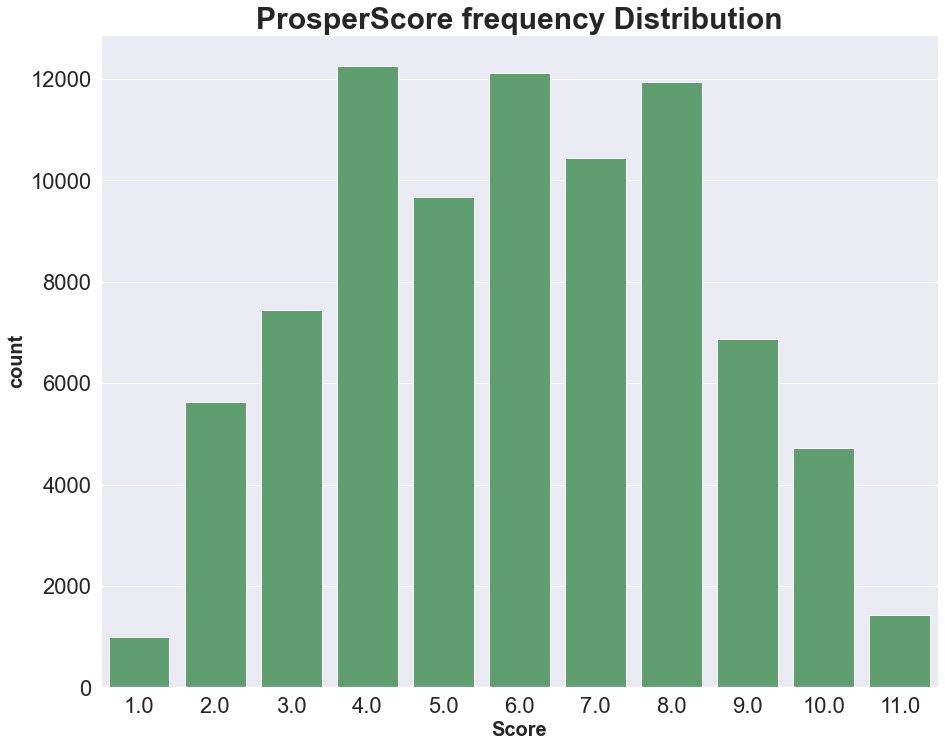

In [115]:
plt.figure(figsize=(15,12));
sb.countplot(data = new_df, x = 'ProsperScore', color = base_color);
plt.title('ProsperScore frequency Distribution', weight='bold', fontsize= 30);
plt.xlabel('Score', weight='bold', fontsize=20)
plt.ylabel('count', weight='bold', fontsize=20)


Individuals with a score rating of 4.0, 6.0 and 8.0 are the ones with most loans while those with the least score rating of 1.0 have the lease amount of loans

### Stated Monthly Income
#### 5. What is the distribution of the monthly income distribution?

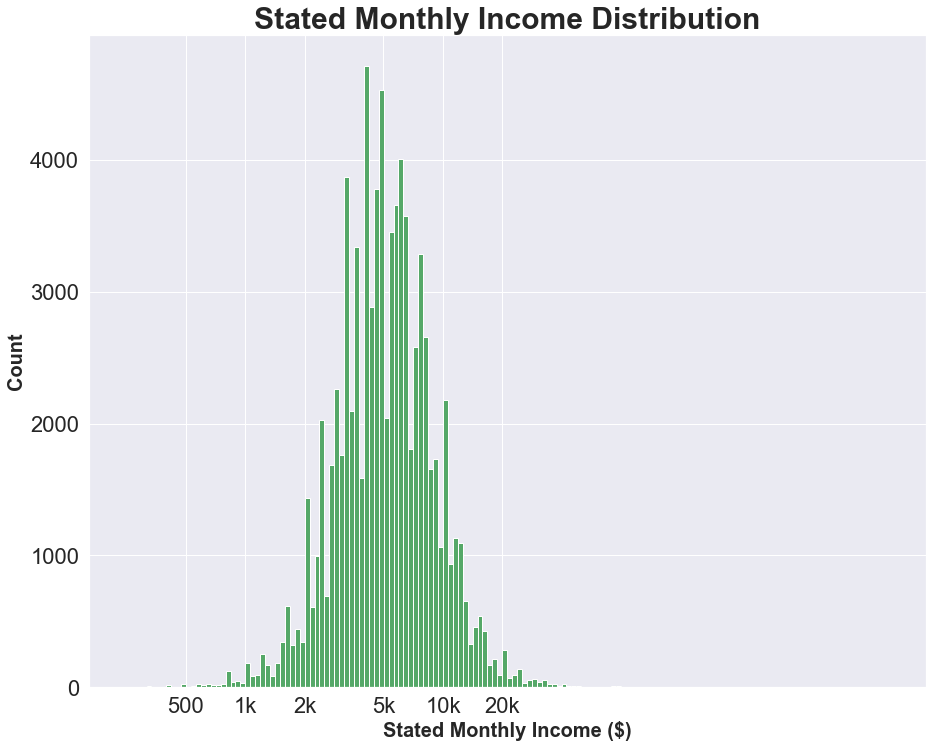

In [138]:
log_binsize = 0.025
bins = 10 ** np.arange(2.4, np.log10(new_df['StatedMonthlyIncome'].max())+log_binsize, log_binsize)

plt.figure(figsize=(15,12))
plt.hist(data = new_df, x = 'StatedMonthlyIncome', bins = bins, color='g')
plt.xscale('log')
plt.xticks([500, 1e3, 2e3, 5e3, 1e4, 2e4, ], [500, '1k', '2k', '5k', '10k', '20k'])
plt.xlabel('Stated Monthly Income ($)', weight='bold', fontsize=20)
plt.ylabel('Count', weight='bold', fontsize=20)
plt.title('Stated Monthly Income Distribution', weight='bold', fontsize=30)
plt.show();

The monthy stated income appears to be normally distributed with the median stated salary being around 5000 dollars.

### Borrow Rate
#### 6. What is the distribution of the borrow rate?

In [69]:
new_df.BorrowerRate.describe()

count    113937.000000
mean          0.192764
std           0.074818
min           0.000000
25%           0.134000
50%           0.184000
75%           0.250000
max           0.497500
Name: BorrowerRate, dtype: float64

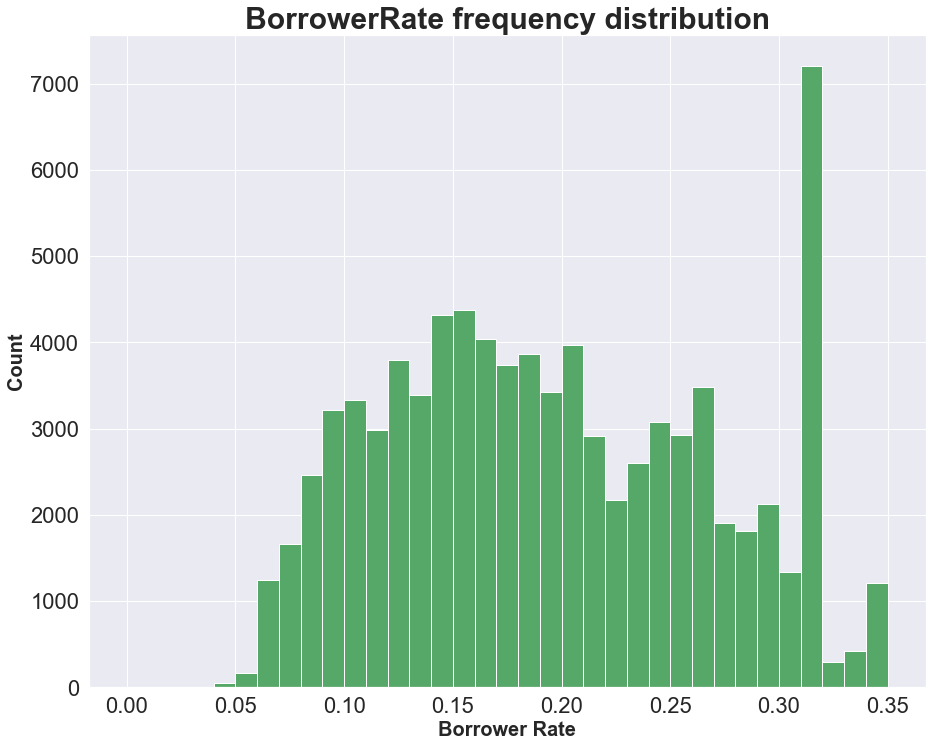

In [137]:
plt.figure(figsize=(15,12))
b = np.arange(0,new_df['BorrowerRate'].value_counts().index.max(),0.01)
plt.hist(data = new_df, x = 'BorrowerRate', bins = b, color='g');

plt.title('BorrowerRate frequency distribution', weight='bold', fontsize=30);
plt.xlabel('Borrower Rate', weight='bold', fontsize=20);
plt.ylabel('Count', weight='bold', fontsize=20);

- The borrowers rate distribution is right skewed with the highest peak at 0.32 meaning most borrowers get a rate of about 0.32
- The maximum borrower rate iss 0.498 while the minimum is 0.0 as can be seen on the table abovethe graph

### Estimated Return
#### 7. What is the distribution of estimated return?

In [74]:
new_df.EstimatedReturn.describe()

count    84853.000000
mean         0.096068
std          0.030403
min         -0.182700
25%          0.074080
50%          0.091700
75%          0.116600
max          0.283700
Name: EstimatedReturn, dtype: float64

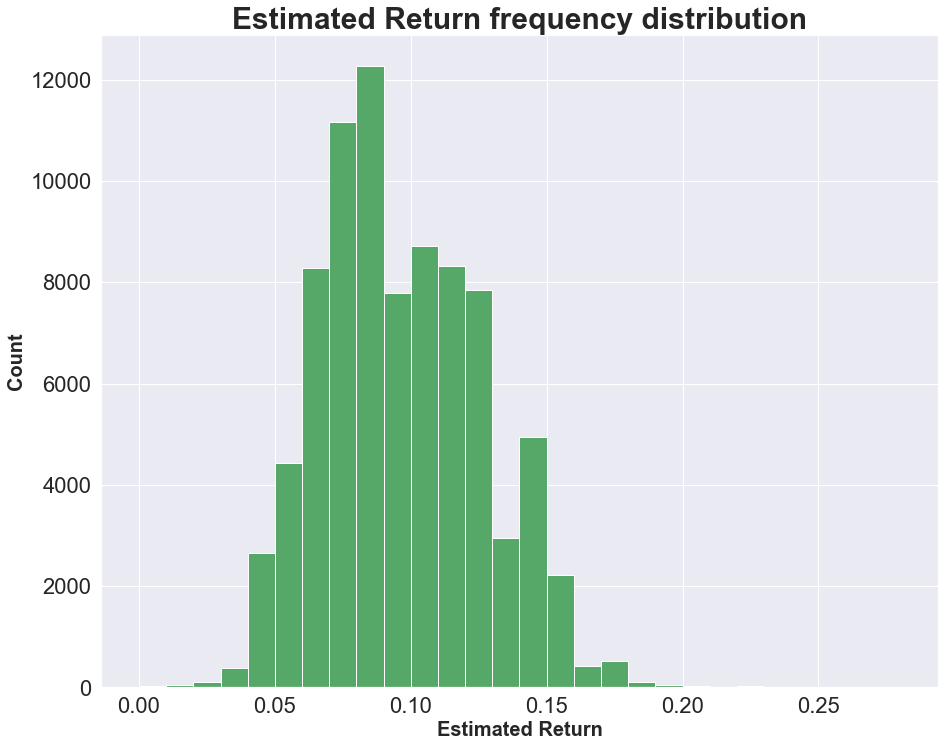

In [139]:
plt.figure(figsize=(15,12))
b = np.arange(0,new_df['EstimatedReturn'].value_counts().index.max(),0.01)
plt.hist(data = new_df, x = 'EstimatedReturn', bins = b, color='g');

plt.title('Estimated Return frequency distribution', weight='bold', fontsize=30);
plt.xlabel('Estimated Return', weight='bold',fontsize=20);
plt.ylabel('Count', weight='bold', fontsize=20);

The distribution of the estimated return is right skewed with the peak at at about 0.07

## Bivariate Exploration

> In this section, investigate relationships between pairs of variables in your
data. Make sure the variables that you cover here have been introduced in some
fashion in the previous section (univariate exploration).

### Employment Status & Income Range vs  Borrower's Rate 
#### 8. 1 Relationship between employment status and borrower's rate
#### 8.2 Relationship between income range and borrower's rate

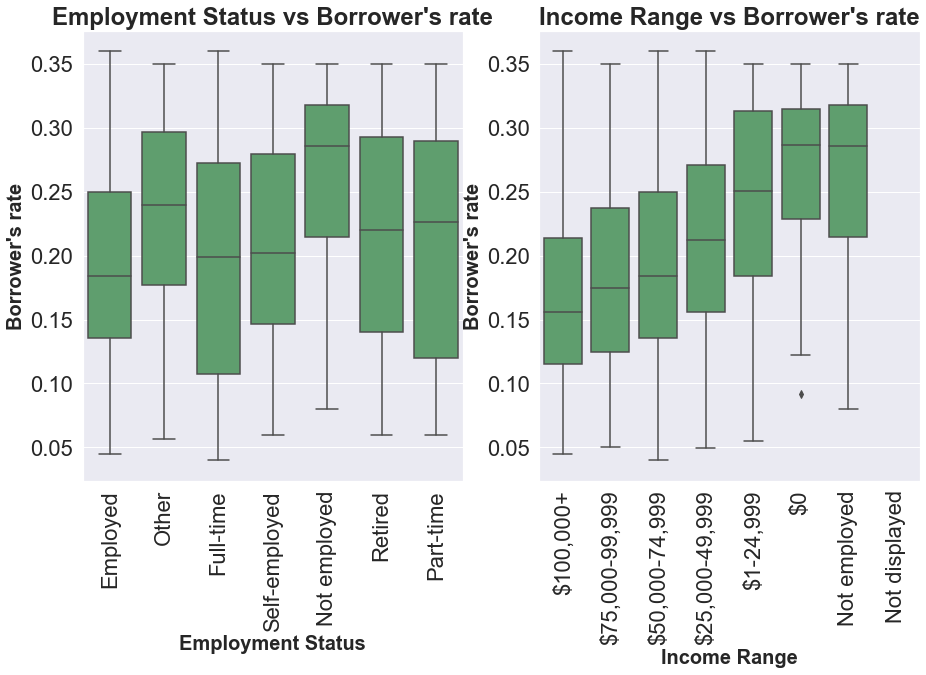

In [128]:
plt.figure(figsize=[15, 8.27]);

plt.subplot(1,2,1)
sb.boxplot(data = new_df, x = 'EmploymentStatus', y = 'BorrowerRate', color=base_color);
plt.title('Employment Status vs Borrower\'s rate', weight = 'bold');
plt.ylabel('Borrower\'s rate', weight='bold', fontsize=20);
plt.xlabel('Employment Status', weight='bold', fontsize=20);
plt.xticks(rotation=90);

plt.subplot(1,2,2)
sb.boxplot(data = new_df, x = 'IncomeRange', y = 'BorrowerRate', color=base_color);
plt.title('Income Range vs Borrower\'s rate', weight='bold');
plt.ylabel('Borrower\'s rate', weight='bold', fontsize=20);
plt.xlabel('Income Range', weight='bold', fontsize=20);
plt.xticks(rotation=90,);


**Employment Status vs Borrower's Rate**

- From the plot it can be noted that the median borrower's rate of those that are not employed is higher compared to all groups.
- The minimum borrowers's rate of those that are not employed is also higher as compared to other groups.


**Income Range vs Borrower's rate**
- It is again noted that the median borrower's rate of those that are unemployed is much higher as compared to the other stated income ranges.

- This could deduce that unemployed people are considered high risks of being unable to pay back the loans hence the high interest rates

### Income Range VS Estimated Return
#### 9. Relationship between income range and estimated return

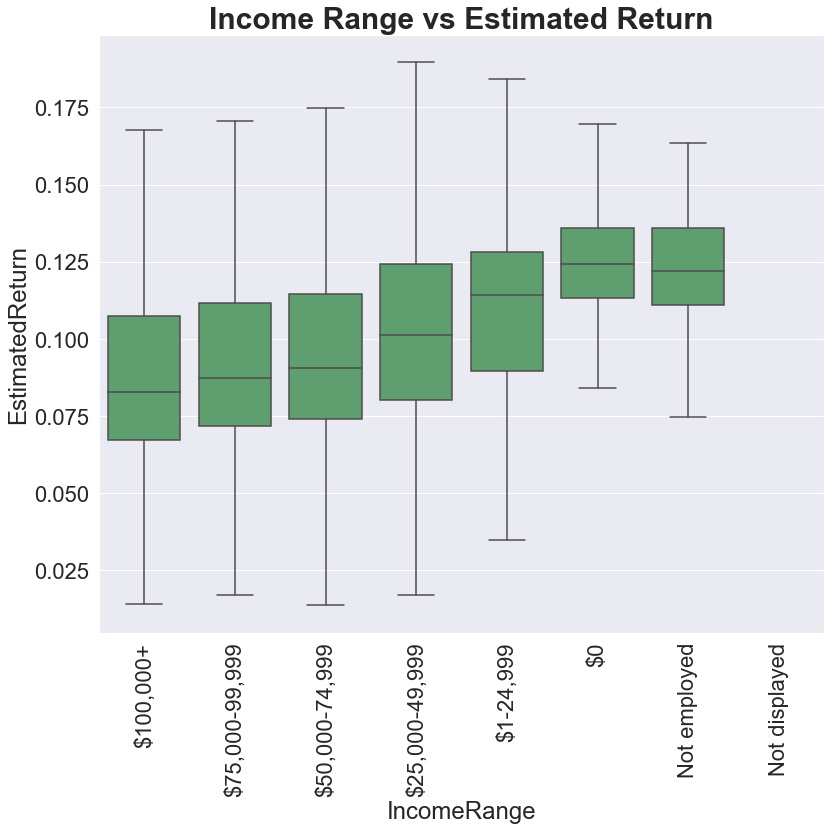

In [147]:
plt.figure(figsize = [13, 11])

base_color = sb.color_palette()[2]
sb.boxplot(data = new_df, x = 'IncomeRange', y= 'EstimatedReturn', color = base_color, showfliers = False)
plt.title('Income Range vs Estimated Return', weight='bold', fontsize=30)
plt.xticks(rotation=90);

The 0 dollars income range group have the highest median estimated return, followed by those that are not employed and so forth.
A trend can be seen that The higher you earn the lower the estimated return.

### Prosper Score vs Borrower's Rate
#### 10. Relationship between prosper score and borrower's rate

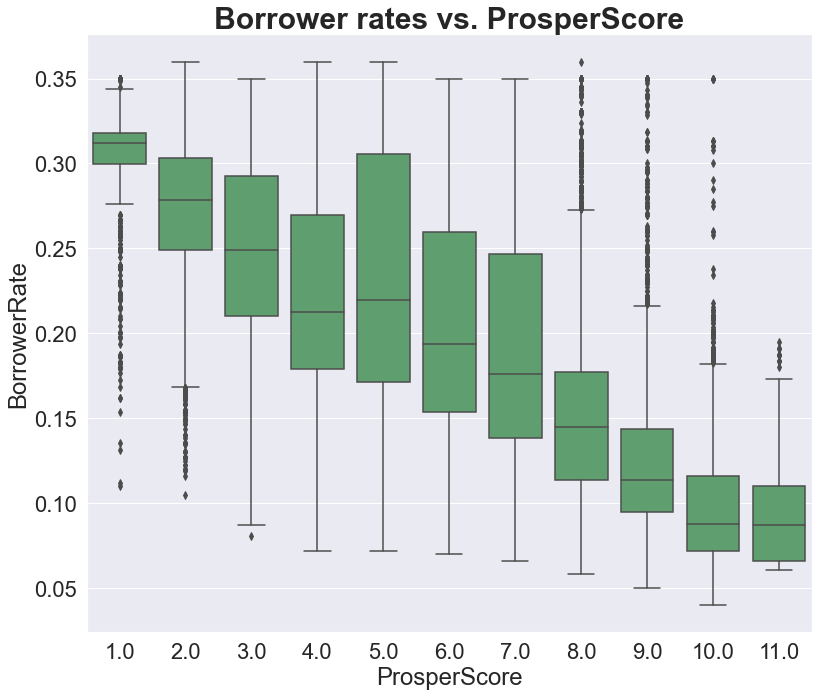

In [148]:
plt.figure(figsize=[13, 11]);
sb.boxplot(data = df, x = 'ProsperScore', y = 'BorrowerRate', color = base_color);
plt.title('Borrower rates vs. ProsperScore', weight='bold', fontsize=30);

- The prosper score is a paramount factor in determining the borrower's rate and ultimately whether one receives a loan or not.
- It is seen on plot above that the higher the score, the lower the borrower's rate

### Prosper Score vs Borrower's Rate
#### 10. Relationship between prosper score and income range

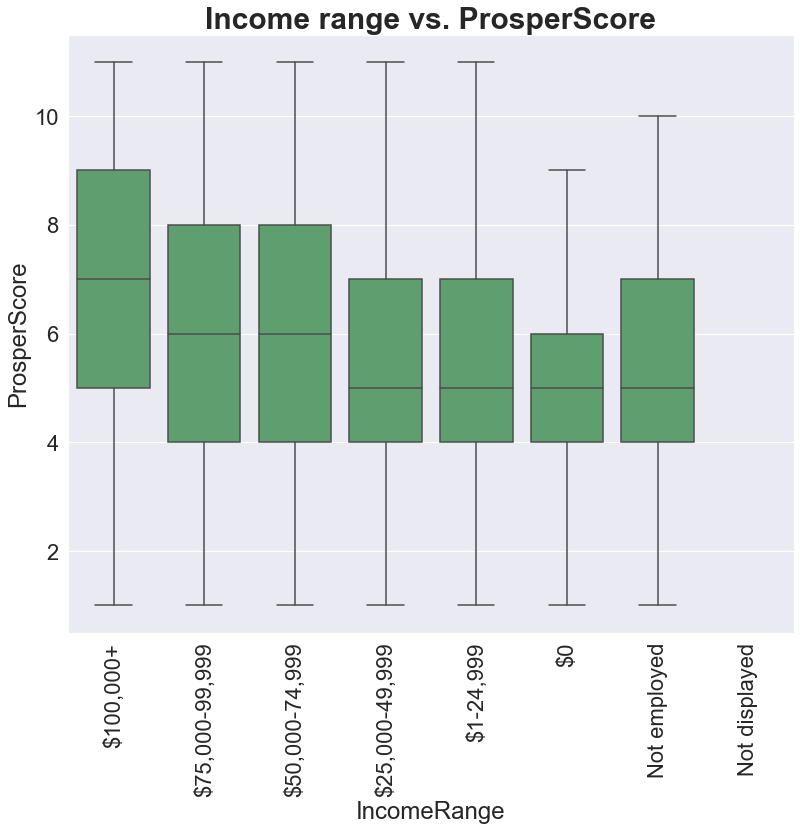

In [149]:
plt.figure(figsize=[13, 11]);
sb.boxplot(data = new_df, y = 'ProsperScore', x = 'IncomeRange', color = base_color);
plt.xticks(rotation=90)
plt.title('Income range vs. ProsperScore', weight='bold', fontsize=30);

- The maximum score for for the income groups between 1 dollars to 100+ dollars is 11 and it is lower for the 0 Dollar income range and the not employed group.
- The median prosper score decreases with income and is constant for some ranges
- From this it can be said that although there is not much distinction but it seems the higher an individual earns, the better their chances of having a higher prosper score

## Multivariate Exploration

> Create plots of three or more variables to investigate your data even
further. Make sure that your investigations are justified, and follow from
your work in the previous sections.

#### 11. What is the realtionship between borrower's rate, prosper score and income range?

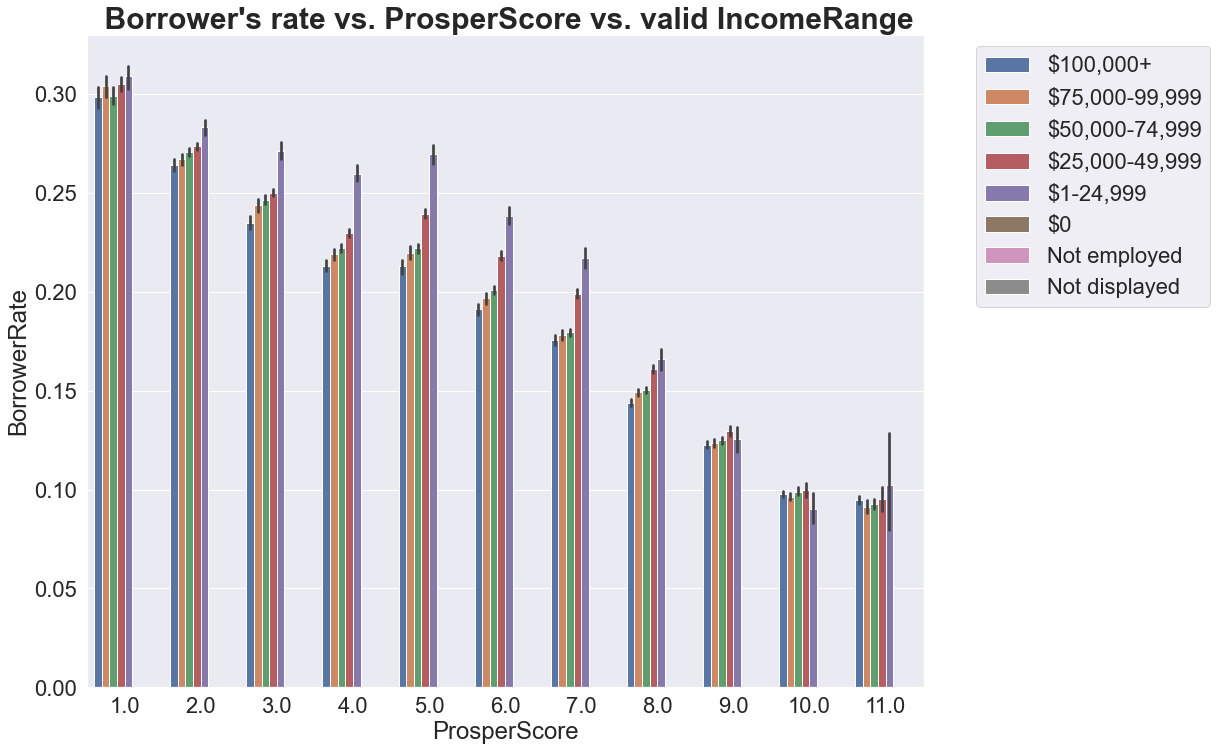

In [135]:
plt.figure(figsize=(15,12));
income_range_valid = ['$25,000-49,999','$50,000-74,999','$100,000+','$75,000-99,999','$1-24,999']
income_range_sub = new_df.loc[new_df['IncomeRange'].isin(income_range_valid)]

sb.barplot(data = income_range_sub, x = 'ProsperScore', y = 'BorrowerRate', hue = 'IncomeRange');
plt.title(' Borrower\'s rate vs. ProsperScore vs. valid IncomeRange', weight = 'bold', fontsize=30);

plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left');

From the plot above it can be seen that the higher the prosper , the lower the interest rate for most of the income ranges.

#### 12. What is the relationship between median estimated range, prosper score nad income range

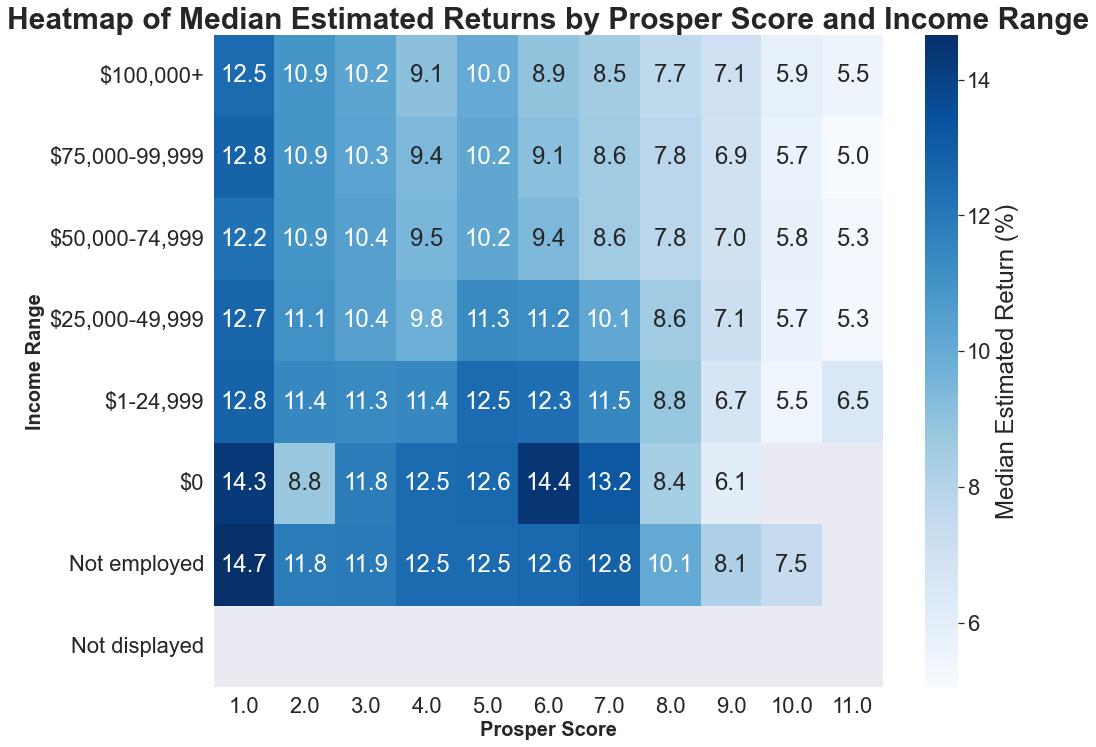

In [136]:
# create a heat map of average estimated returns
plt.figure(figsize = (15,12))

cat_med = new_df.groupby(['ProsperScore', 'IncomeRange']).median()['EstimatedReturn']*100
cat_med = cat_med.reset_index(name = 'EstimatedReturnMedian')
cat_med = cat_med.pivot(index = 'IncomeRange', columns = 'ProsperScore', values = 'EstimatedReturnMedian')

sb.heatmap(cat_med, annot = True, fmt = '.1f', cmap = "Blues", cbar_kws = {'label' : 'Median Estimated Return (%)'})
plt.xlabel('Prosper Score', weight='bold', fontsize=20)
plt.ylabel('Income Range', weight='bold', fontsize=20)
plt.title('Heatmap of Median Estimated Returns by Prosper Score and Income Range', weight='bold', fontsize=30);

The above plot investigate the relationship between income ranges, prosper score, and estimated returns.
It can be deduced from the above plot that the lower the income range and the lower the prosper score, the higher the estimated return.

This could be due to the fact that individuals with lower prosper scores and salary incomes get a higher borrower's rate.

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> The first multivirate plot shows that the higher the prosper score , the lower the interest rate for most of the income ranges.

> The second plot showed that lower income ranges and lower prosper scores results in higher estimated returns



## Conclusions
> The purpose of this investigation was to investigate factors that are considered when individuals are given loans by Prosper Loans.

> The dataset for Prosper loans was loaded and explored.

> A little bit of wrangling was performed for the Category Listing Column where reasons displayed by numerics were mapped to actual reasons in words for clarity and the column name was renamed according naming conventions rules.

> Most of the features of interest did not require wrangling and were used as such.

> Firstly univiriate exploration was conducted with different plots and findings as documented at the end of each plot.

> Secondly, Biviriate plots were also plotted showing the relationships between two variables and the findings were also documented athe end of each plot with a summary at the end of the bivariate section

> Lastly, The multivariate exploration was performed where plots with more than two variables were explored and the findings were also documented at the end of each plot with the summary at the end of the bivariate section.

> In conclusion, based on the visualizations, the factors that were investigated are mostly related to one another and prosper loans uses the relationship between the factors for determing other factors e.g Posper Loans can use the Prosper Score and Income Range, Employments stayus to determine the annual borrower's rate.

